### standard, min-max, robust 비교 고찰

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns

# IPython 에서 제공하는 Rich output 에 대한 표현 방식
# 도표와 같은 그림, 소리, 애니메이션 과 같은 결과물들을 Rich output 이라 합니다.
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),    # np.concatenate 배열 합치기
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

<function RandomState.normal>

In [20]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])

In [2]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1', 'x2'])

In [3]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])

In [7]:
minmax_df

,x1,x2
0,0.945133,0.138065
1,0.750521,0.209642
2,0.782826,0.255658
3,0.743922,0.135570
4,0.707728,0.141994
...,...,...
1020,0.071933,0.895391
1021,0.097187,1.000000
1022,0.106958,0.727716
1023,0.140741,0.748886


In [8]:
robust_df

,x1,x2
0,1.733472,-0.703802
1,-0.404157,0.080531
2,-0.049310,0.584756
3,-0.476637,-0.731134
4,-0.874199,-0.660741
...,...,...
1020,-7.857813,7.594803
1021,-7.580422,8.741080
1022,-7.473101,5.757453
1023,-7.102020,5.989428


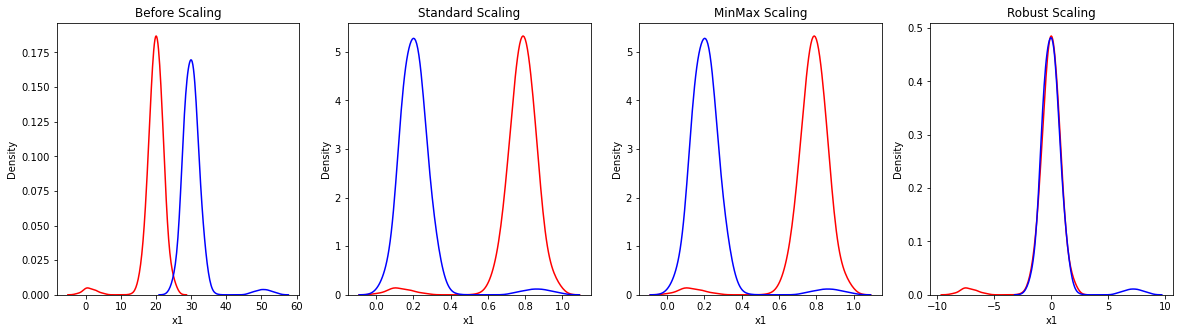

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax = ax1, color='red')
sns.kdeplot(x['x2'], ax = ax1, color='blue')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax = ax2, color='red')
sns.kdeplot(standard_df['x2'], ax = ax2, color='blue')

ax3.set_title("MinMax Scaling")
sns.kdeplot(minmax_df['x1'], ax = ax3, color='red')
sns.kdeplot(minmax_df['x2'], ax = ax3, color='blue')

ax4.set_title("Robust Scaling")
sns.kdeplot(robust_df['x1'], ax = ax4, color='red')
sns.kdeplot(robust_df['x2'], ax = ax4, color='blue')

plt.show()

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


<AxesSubplot:title={'center':'Before Scaling'}, xlabel='x1', ylabel='Density'>

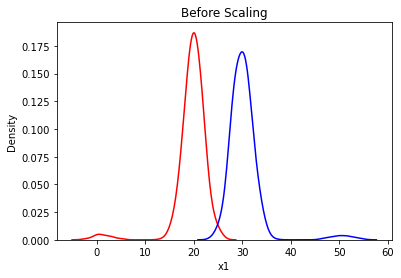

In [10]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

fig = plt.plot(figsize=(20,5))
plt.title('Before Scaling')
sns.kdeplot(x['x1'], color='red')
sns.kdeplot(x['x2'], color='blue')

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 qnstks 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


<AxesSubplot:title={'center':'StandardScaler'}, xlabel='x1', ylabel='Density'>

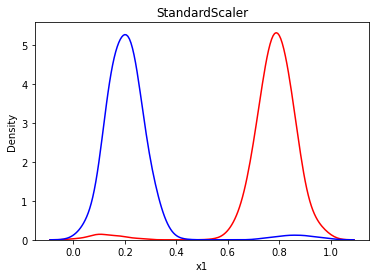

In [16]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 셋 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.fit_transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 
# 이를 DataFrame으로 변환

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 qnstks 값')
print(iris_df_scaled.var())

fig = plt.plot(figsize=(20,5))
plt.title('StandardScaler')
sns.kdeplot(standard_df['x1'], color='red')
sns.kdeplot(standard_df['x2'], color='blue')

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


<AxesSubplot:title={'center':'MinMaxScaler'}, xlabel='x1', ylabel='Density'>

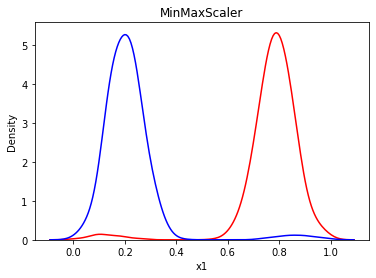

In [15]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 셋 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.fit_transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 
# 이를 DataFrame으로 변환

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_scaled.max())

fig = plt.plot(figsize=(20,5))
plt.title('MinMaxScaler')
sns.kdeplot(minmax_df['x1'], color='red')
sns.kdeplot(minmax_df['x2'], color='blue')

feature들의 중간 값
sepal length (cm)    0.000000e+00
sepal width (cm)     0.000000e+00
petal length (cm)    1.266348e-16
petal width (cm)     0.000000e+00
dtype: float64

feature 들의 사분위 값
0.9333333333333333


<AxesSubplot:title={'center':'RobustScaler'}, xlabel='x1', ylabel='Density'>

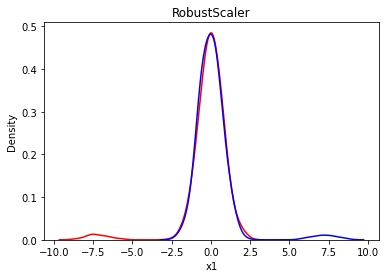

In [14]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np

# RobustScaler 객체 생성
scaler = RobustScaler()

# RobustScaler로 데이터 셋 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.fit_transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 
# 이를 DataFrame으로 변환

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

q3, q1 = np.percentile(iris_df_scaled, [72, 25])
iqr = q3 - q1

print('feature들의 중간 값')
print(iris_df_scaled.median())
print('\nfeature 들의 사분위 값')
print(iqr)

fig = plt.plot(figsize=(20,5))
plt.title('RobustScaler')
sns.kdeplot(robust_df['x1'], color='red')
sns.kdeplot(robust_df['x2'], color='blue')